In [ ]:
!pip install pylangacq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.8 MB/s eta 0:00:00


In [ ]:
!pip install librosa


Label: Dementia
Audio Duration: 55.19 seconds


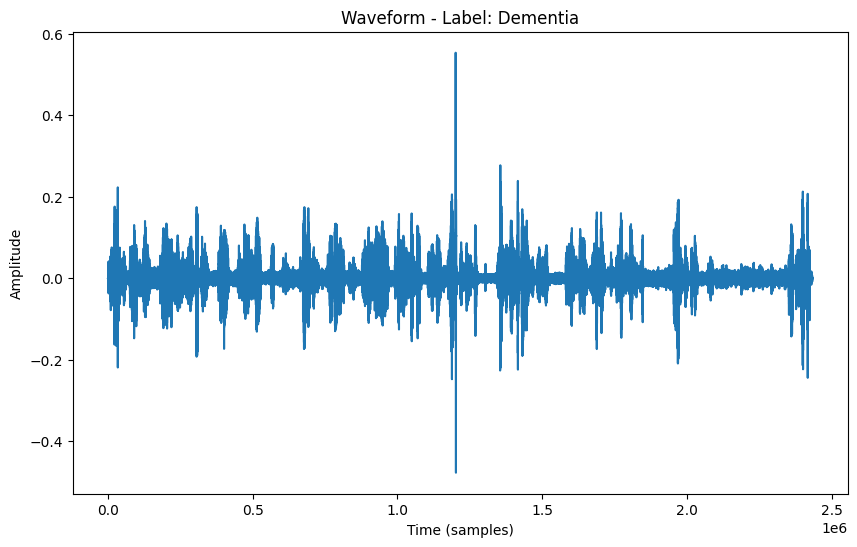

Label: Control
Audio Duration: 62.74 seconds


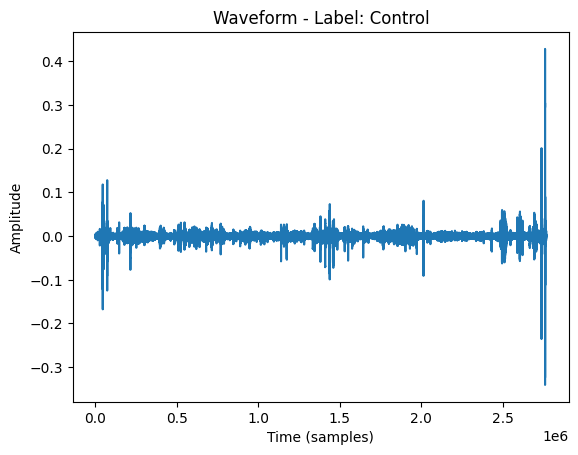

In [ ]:
import librosa
import os
import matplotlib.pyplot as plt

# Path to the main directory containing Dementia and control subfolders
base_dir = "/content/drive/MyDrive/Dementia Bank-audio/"

# List of subfolders (Dementia and control)
subfolders = ["Dementia", "Control"]

# Plot parameters
plt.figure(figsize=(10, 6))

# Loop through subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(base_dir, subfolder)

    # Path to the "cookie" subfolder within each class folder
    cookie_path = os.path.join(subfolder_path, "cookie")

    # List of audio files in the "cookie" subfolder
    audio_files = [file for file in os.listdir(cookie_path) if file.endswith(".mp3")]

    if audio_files:
        # Get the first audio file in the "cookie" subfolder
        audio_file = os.path.join(cookie_path, audio_files[0])

        # Load the audio using librosa
        audio, sr = librosa.load(audio_file, sr=None)

        # Display the audio information
        print(f"Label: {subfolder}")
        print(f"Audio Duration: {len(audio)/sr:.2f} seconds")

        # Plot the waveform
        plt.plot(audio)
        plt.title(f"Waveform - Label: {subfolder}")
        plt.xlabel("Time (samples)")
        plt.ylabel("Amplitude")
        plt.show()


In [ ]:
import librosa
import os

# Path to the main directory containing Dementia and control subfolders
base_dir = "/content/drive/MyDrive/Dementia Bank-audio/"

# List of subfolders (Dementia and control)
subfolders = ["Dementia", "Control"]

# Lists to store audio data
dementia_audio = []
control_audio = []

# Loop through subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(base_dir, subfolder)

    # Path to the "cookie" subfolder within each class folder
    cookie_path = os.path.join(subfolder_path, "cookie")

    # List of audio files in the "cookie" subfolder
    audio_files = [file for file in os.listdir(cookie_path) if file.endswith(".mp3")]

    # Loop through audio files in the "cookie" subfolder
    for audio_file in audio_files:
        audio_file_path = os.path.join(cookie_path, audio_file)



        # Append audio data to the appropriate list based on the subfolder
        if subfolder == "Dementia":
            dementia_audio.append(audio_file_path)
        elif subfolder == "Control":
            control_audio.append(audio_file_path)


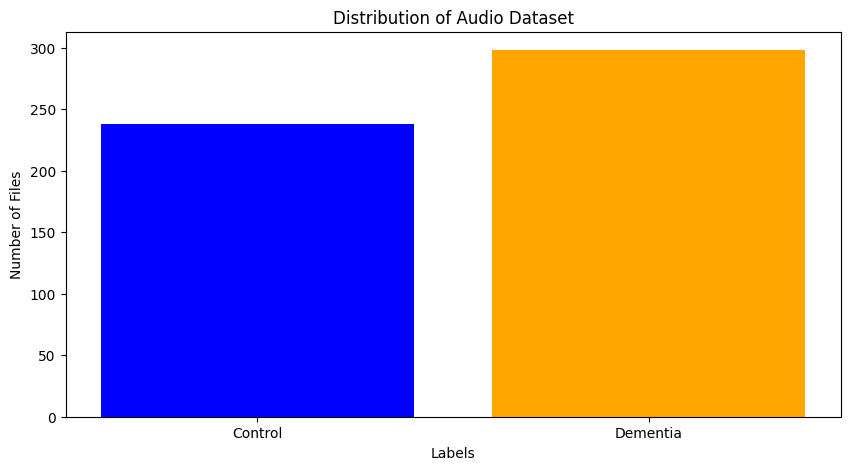

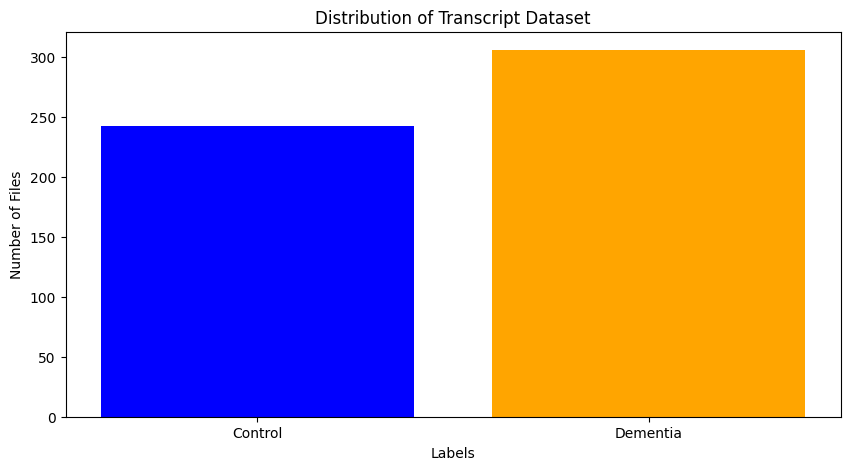

In [ ]:
import matplotlib.pyplot as plt

# Data
audio_labels = ['Control', 'Dementia']
audio_counts = [238, 298]

transcript_labels = ['Control', 'Dementia']
transcript_counts = [243, 306]

# Create distribution plots for Audio dataset
plt.figure(figsize=(10, 5))
plt.bar(audio_labels, audio_counts, color=['blue', 'orange'])
plt.xlabel('Labels')
plt.ylabel('Number of Files')
plt.title('Distribution of Audio Dataset')
plt.show()

# Create distribution plots for Transcript dataset
plt.figure(figsize=(10, 5))
plt.bar(transcript_labels, transcript_counts, color=['blue', 'orange'])
plt.xlabel('Labels')
plt.ylabel('Number of Files')
plt.title('Distribution of Transcript Dataset')
plt.show()


In [ ]:
sample = r"/content/drive/MyDrive/Dementia Bank-audio/Dementia/cookie/001-0.mp3" # single bark
x,freq = librosa.load(sample)
sr=freq

In [ ]:
print(x.shape)
print(type(x))
print(freq)
print(type(freq))

(1216969,)
<class 'numpy.ndarray'>
22050
<class 'int'>


In [ ]:
import IPython.display as ipd
ipd.Audio(sample)

In [ ]:
import librosa.display

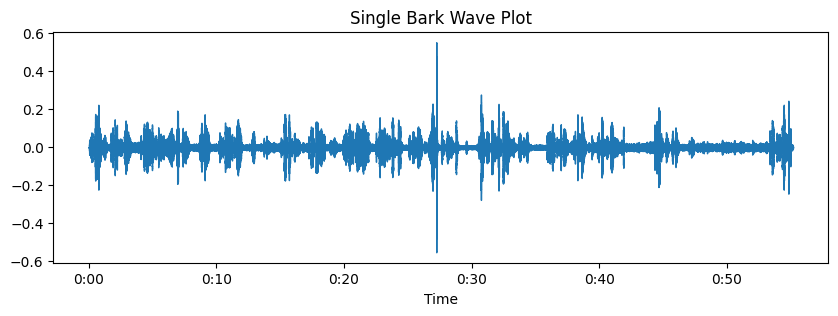

In [ ]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(10,3))
plt.title("Single Bark Wave Plot")
librosa.display.waveshow(x,sr=freq)

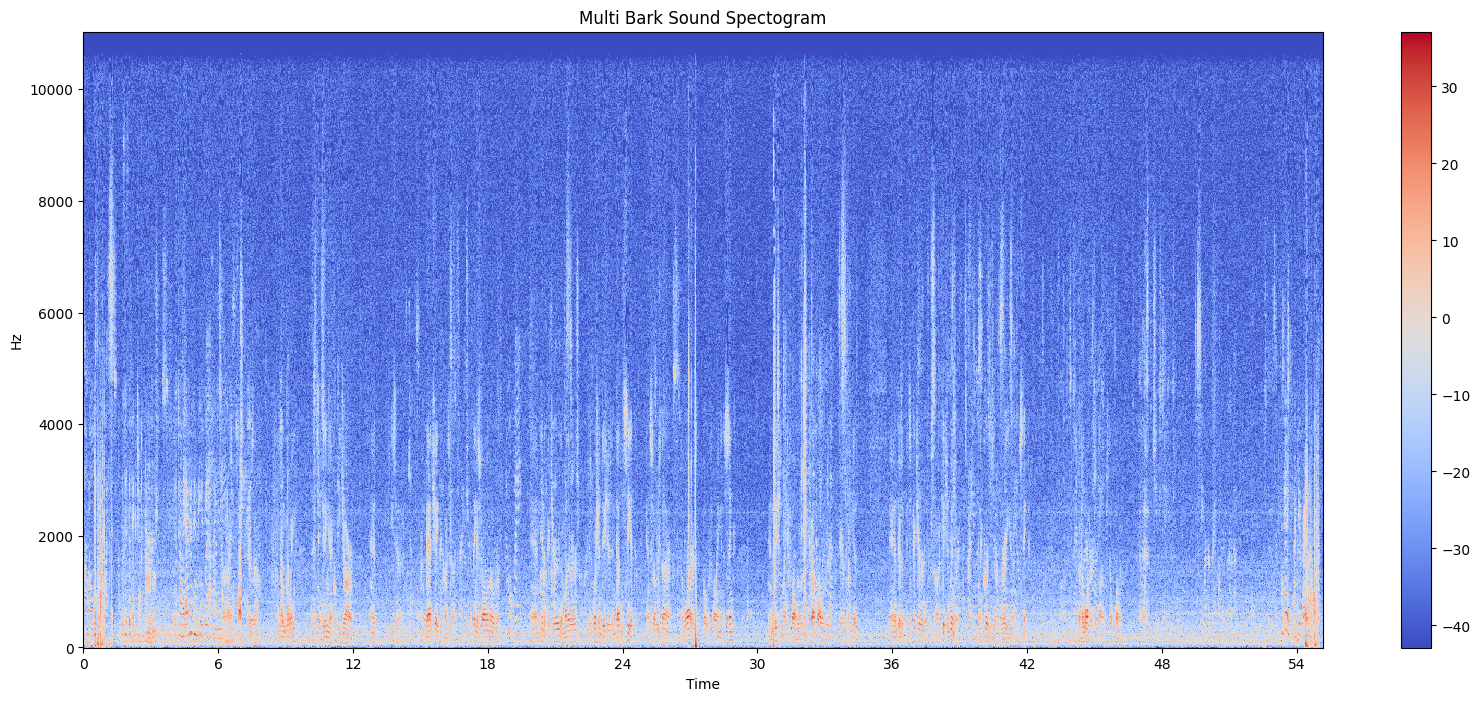

In [ ]:
X=librosa.stft(x) #stft -> Short-time Fourier transform
X_db=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
plt.figure(figsize=(20,8))
librosa.display.specshow(X_db, sr=sr,x_axis="time",y_axis="hz")
plt.title("Multi Bark Sound Spectogram")
plt.colorbar()

In [ ]:
!pip install librosa --upgrade


In [ ]:
sr=22050

shape of mfcc: (40, 2377)


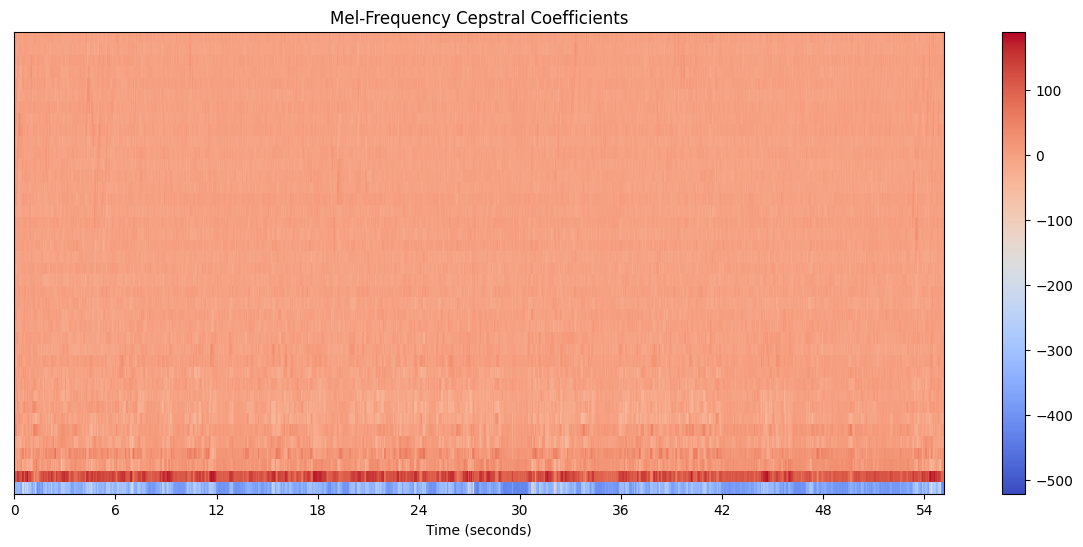

In [ ]:
mfcc=librosa.feature.mfcc(y=x,sr=sr,n_mfcc=40)
print("shape of mfcc:" ,mfcc.shape)


plt.figure(figsize=(15,6))
librosa.display.specshow(mfcc,x_axis="s")
plt.title("Mel-Frequency Cepstral Coefficients")
plt.colorbar()

In [ ]:
zero_crossing=librosa.zero_crossings(x)
print("Type of Zero Crossing Rate",type(zero_crossing))
print(zero_crossing, " --> See it contains booleans")
print("Total Number of Zero Crossing is: ",sum(zero_crossing))
plt.figure(figsize=(15,5))
plt.title("Zero Crossing Rate")
plt.plot(x[4000:5100])
plt.grid()

Type of Zero Crossing Rate <class 'numpy.ndarray'>
[ True  True False ...  True  True  True]  --> See it contains booleans
Total Number of Zero Crossing is:  93456


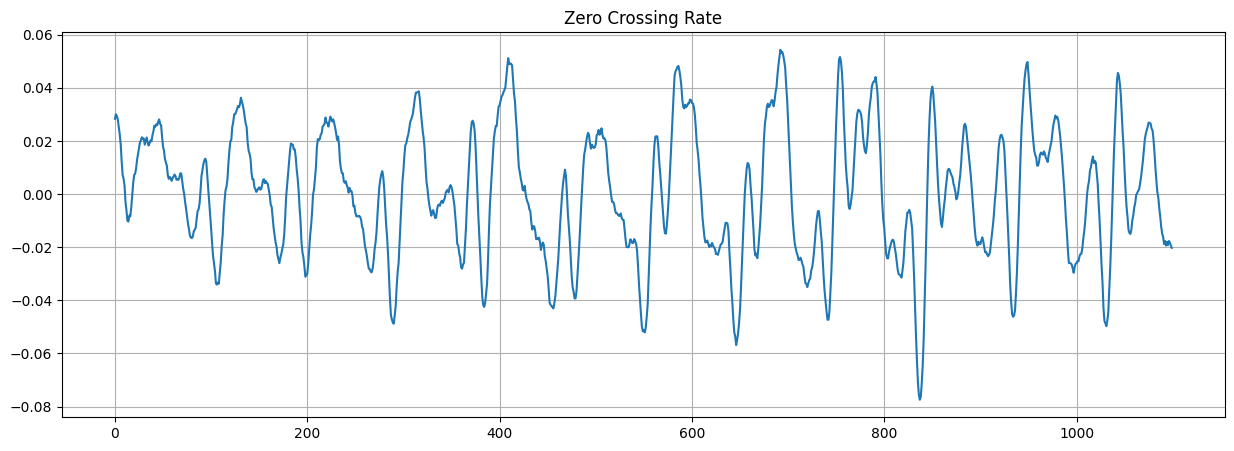

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Zero Crossing Rate")
plt.plot(x[4000:5100])
plt.grid()

(1, 2377)


Text(0, 0.5, 'Hz')

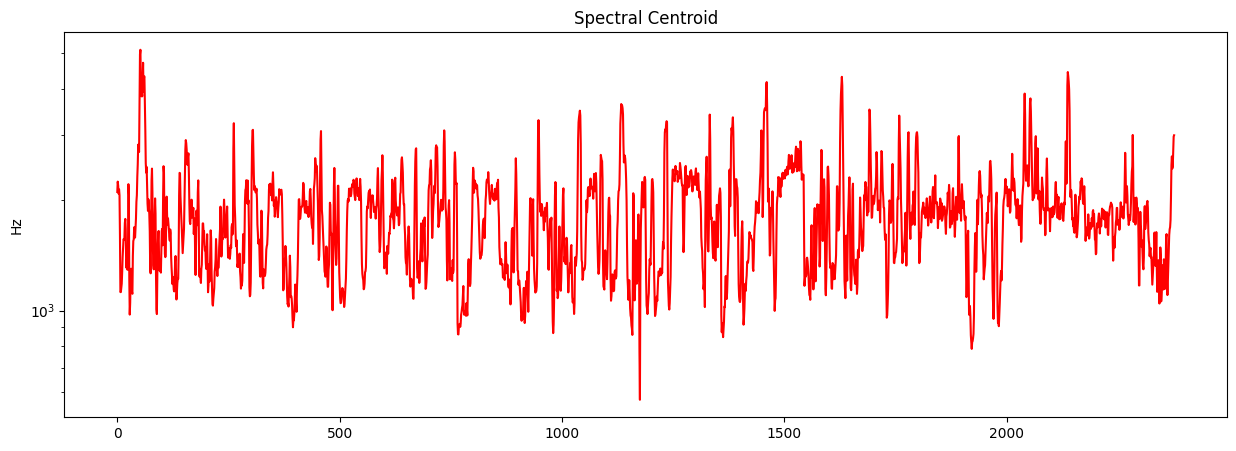

In [ ]:
spec_cent=librosa.feature.spectral_centroid(y=x)
print(spec_cent.shape)

plt.figure(figsize=(15,5))
plt.title("Spectral Centroid")
plt.semilogy(spec_cent.T, "r")
plt.ylabel("Hz")

(1, 2377)


Text(0, 0.5, 'Hz')

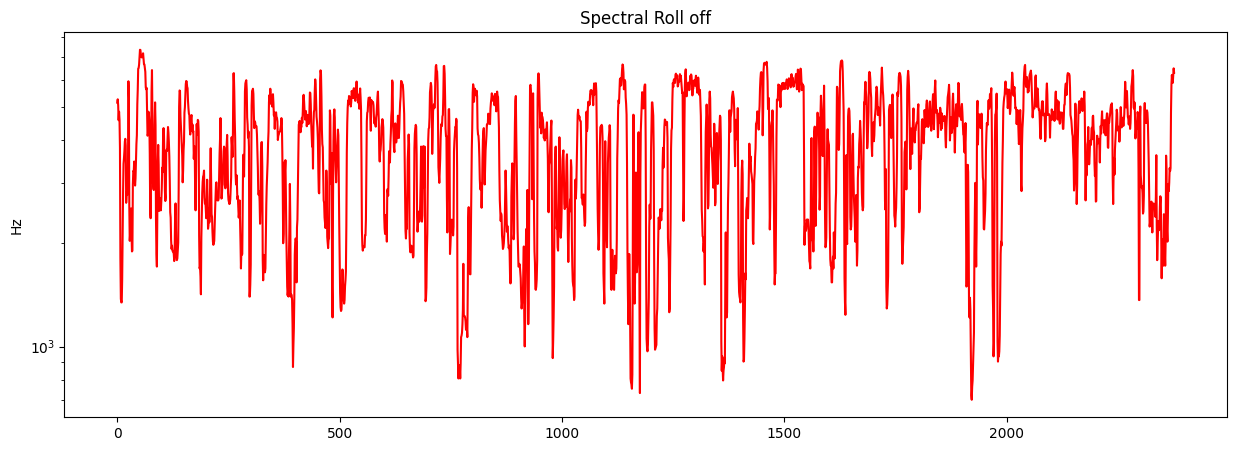

In [ ]:
spec_roll=librosa.feature.spectral_rolloff(y=x,sr=sr)
print(spec_roll.shape)

plt.figure(figsize=(15,5))
plt.title("Spectral Roll off")
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")

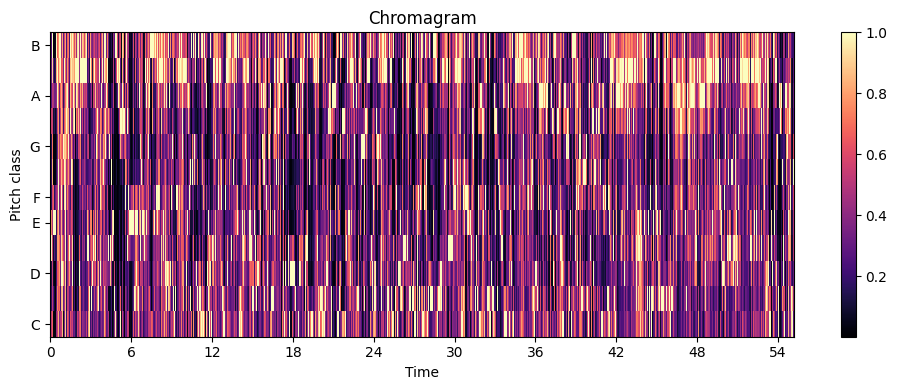

In [ ]:
chroma=librosa.feature.chroma_stft(y=x, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [ ]:
import numpy as np

(1, 2373)


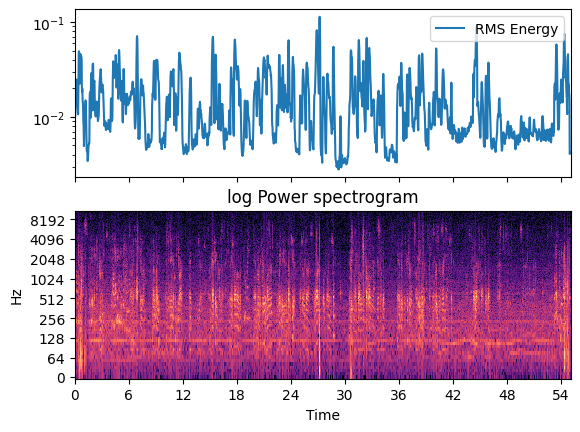

In [ ]:
S = librosa.magphase(librosa.stft(y=x, window=np.ones, center=False))[0]
RMSEn= librosa.feature.rms(S=S)
print(RMSEn.shape)


fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(RMSEn)
plt.title("Root Mean Squared Energy & log Pawer Spectogram")
ax[0].semilogy(times, RMSEn[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
plt.show()

In [ ]:
length = len(control_audio)
print(length)

238


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import librosa

# Lists to store MFCC features and labels
mfcc_features = []
labels = []

# Sample rate for the audio files
sr = 22050

# Desired number of time steps for MFCC features
desired_time_steps = 2377  # Adjust this value as needed

# Process Dementia audio files
for audio_file_path in dementia_audio:
    audio, _ = librosa.load(audio_file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    # Ensure consistent time steps by padding or truncating
    if mfcc.shape[1] < desired_time_steps:
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, desired_time_steps - mfcc.shape[1])), mode='constant')
        mfcc_features.append(mfcc_padded)
        labels.append(0)  # Dementia label

# Process Control audio files
for audio_file_path in control_audio:
    audio, _ = librosa.load(audio_file_path, sr=sr)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)
    # Ensure consistent time steps by padding or truncating
    if mfcc.shape[1] < desired_time_steps:
        mfcc_padded = np.pad(mfcc, ((0, 0), (0, desired_time_steps - mfcc.shape[1])), mode='constant')
        mfcc_features.append(mfcc_padded)
        labels.append(1)  # Control label

# Convert the lists to numpy arrays
mfcc_features = np.array(mfcc_features)
all_labels = np.array(labels)

# Calculate the number of augmentations based on the desired size of X_train
desired_train_size = 2470
num_augmentations = desired_train_size // len(mfcc_features)

# Apply data augmentation to match the desired size
augmented_mfcc_features = []
augmented_labels = []

for mfcc, label in zip(mfcc_features, all_labels):
    # Create multiple augmented versions of the MFCC features
    for _ in range(num_augmentations):
        augmented_mfcc = mfcc + np.random.normal(0, 0.5, size=mfcc.shape)
        augmented_mfcc_features.append(augmented_mfcc)
        augmented_labels.append(label)

# Convert the lists to numpy arrays
augmented_mfcc_features = np.array(augmented_mfcc_features)
augmented_labels = np.array(augmented_labels)

# Combine the augmented data with the original data
combined_mfcc_features = np.vstack((mfcc_features, augmented_mfcc_features))
combined_labels = np.concatenate((all_labels, augmented_labels))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_mfcc_features, combined_labels, test_size=0.2, random_state=42)


In [ ]:
augmented_mfcc_features.shape

(2457, 40, 2377)

In [ ]:
y_train.shape


(2116,)

In [ ]:
X_train.shape

(2116, 40, 2377)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

# Load the preprocessed data
# X_train, X_test, y_train, y_test = ... (from the previous code)

# Calculate class weights for handling class imbalance


# Define the deep learning model
model = Sequential()
model.add(Flatten(input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a lower learning rate
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
67/67 [==============================] - 6s 81ms/step - loss: 0.7097 - accuracy: 0.6635 - val_loss: 0.3392 - val_accuracy: 0.8509
Epoch 2/5
67/67 [==============================] - 5s 68ms/step - loss: 0.3831 - accuracy: 0.8237 - val_loss: 0.2673 - val_accuracy: 0.8887
Epoch 3/5
67/67 [==============================] - 4s 52ms/step - loss: 0.2269 - accuracy: 0.9130 - val_loss: 0.0738 - val_accuracy: 1.0000
Epoch 4/5
67/67 [==============================] - 4s 55ms/step - loss: 0.1518 - accuracy: 0.9509 - val_loss: 0.0907 - val_accuracy: 0.9717
Epoch 5/5
17/17 [==============================] - 1s 17ms/step - loss: 0.0330 - accuracy: 1.0000
Test Loss: 0.0330
Test Accuracy: 1.0000


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Print ROC AUC score
print(f"ROC AUC Score: {roc_auc:.4f}")

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)


17/17 [==============================] - 1s 27ms/step
ROC AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       289

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530

Confusion Matrix:
[[241   0]
 [  0 289]]


In [ ]:
!pip install chamd

  Preparing metadata (setup.py) ... done
  Created wheel for chamd: filename=chamd-0.5.11-py3-none-any.whl size=15140 sha256=5f4a760d317fbecbe4bd28c5ae2bb5cd0c67a710082949868c42aee99a160800
  Stored in directory: /root/.cache/pip/wheels/c9/00/46/f2e02814d44b9e9956d7300e32245518d46d9db7bd09348485
Successfully built chamd


In [ ]:
import pylangacq
url = "002-0.cha"
brown = pylangacq.read_chat(url)

In [ ]:
brown.head()

*PAR:  the          scene     is         in       the          kitchen    .
%mor:  det:art|the  n|scene   cop|be&3S  prep|in  det:art|the  n|kitchen  .
%gra:  1|2|DET      2|3|SUBJ  3|0|ROOT   4|3|JCT  5|6|DET      6|4|POBJ   7|3|PUNCT
%wor:	the 30_3800 scene 3800_4050 is 4050_4130 <in 4130_4190 the 4190_4800> [/] in the kitchen . 4800_5640

*PAR:  the          mother    is         wiping           dishes     and        the          water      is         running         on         the          floor       .
%mor:  det:art|the  n|mother  aux|be&3S  part|wipe-PRESP  n|dish-PL  coord|and  det:art|the  n|water    aux|be&3S  part|run-PRESP  prep|on    det:art|the  n|floor     .
%gra:  1|2|DET      2|4|SUBJ  3|4|AUX    4|0|ROOT         5|4|OBJ    6|10|LINK  7|8|DET      8|10|SUBJ  9|10|AUX   10|4|CJCT       11|10|JCT  12|13|DET    13|11|POBJ  14|4|PUNCT
%wor:	the 5703_5933 mother 5933_6093 is 6183_6613 wiping 6753_7073 dishes 7183_7753 and 7803_7893 the 7893_8793 water 8833_9033 is 9033_9363 running 9433_9673 on 10943_11083 the 11083_11113 floor 11113_11843 .

*PAR:  a          boy       is         trying          to       get       cookies      out      of       a          jar        and         he's                  about      to         tip          over       on         a          stool       .
%mor:  det:art|a  n|boy     aux|be&3S  part|try-PRESP  inf|to   v|get     n|cookie-PL  adv|out  prep|of  det:art|a  n|jar      coord|and   pro:sub|he~cop|be&3S  adv|about  inf|to     v|tip        adv|over   prep|on    det:art|a  n|stool     .
%gra:  1|2|DET    2|4|SUBJ  3|4|AUX    4|0|ROOT        5|6|INF  6|4|COMP  7|6|OBJ      8|6|JCT  9|8|JCT  10|11|DET  11|9|POBJ  12|14|LINK  13|14|SUBJ 14|4|CJCT  15|17|JCT  16|17|INF  17|14|CPRED  18|17|JCT  19|17|JCT  20|21|DET  21|19|POBJ  22|4|PUNCT
%wor:	<a 11898_11958 child 12218_12638 is 12638_12858 tryin(g) 12938_13198 to 13198_13258 get 13368_13578> [//] a boy is tryin(g) to get cookies outta [: out of] 13758_15368 a 15368_15398 jar 15398_15668 and 15668_15768 he's 15848_15988 about 16098_16388 to 16388_16508 tip 16558_16718 over 16718_16838 on 16838_16948 a 17298_17328 stool 17328_17928 .

*PAR:  the          little      girl      is         reacting          to       his           falling          .
%mor:  det:art|the  adj|little  n|girl    aux|be&3S  part|react-PRESP  prep|to  det:poss|his  part|fall-PRESP  .
%gra:  1|3|DET      2|3|MOD     3|5|SUBJ  4|5|AUX    5|0|ROOT          6|5|JCT  7|8|DET       8|6|POBJ         9|5|PUNCT
%wor:	&-uh 18497_18507 the 18537_20727 little 20877_21027 girl 21187_21277 is 21277_21337 reacting 21337_21807 to 22027_22087 his 22267_22477 falling 22477_23097 .

*PAR:  it          seems        to       be        summer    out       .
%mor:  pro:per|it  cop|seem-3S  inf|to   cop|be    n|summer  adv|out   .
%gra:  1|2|SUBJ    2|0|ROOT     3|4|INF  4|2|COMP  5|4|PRED  6|5|NJCT  7|2|PUNCT
%wor:	&-uh 25240_25250 it 25250_25340 seems 25340_25660 to 25660_25800 be 25940_25960 summer 25960_26520 out 26710_26770 .

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder
import nltk
import string
import re
import random
from nltk.corpus import wordnet

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set up stop words and punctuation
stop_words = set(nltk.corpus.stopwords.words('english'))
punctuations = set(string.punctuation)

# Path to the main directory containing Dementia and Control subfolders
base_dir = "/content/drive/MyDrive/Dementia bank-Transcript/"

# List of subfolders (Dementia and Control)
subfolders = ["Dementia", "Control"]

# Lists to store pre-processed transcripts and labels
transcripts = []
labels = []

# Pre-processing functions
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = "".join([char for char in text if char not in punctuations])
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    lemmatizer = nltk.WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    text = " ".join(words)
    return text

def synonym_replacement(text, p=0.1):
    words = nltk.word_tokenize(text)
    new_words = []
    for word in words:
        if random.uniform(0, 1) < p:
            synonyms = wordnet.synsets(word)
            if synonyms:
                synonym = random.choice(synonyms[0].lemma_names())
                new_words.append(synonym)
            else:
                new_words.append(word)
        else:
            new_words.append(word)
    new_text = " ".join(new_words)
    return new_text

# Loop through subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(base_dir, subfolder, "cookie")
    cha_files = [file for file in os.listdir(subfolder_path) if file.endswith(".cha")]

    for cha_file in cha_files:
        cha_file_path = os.path.join(subfolder_path, cha_file)

        with open(cha_file_path, "r") as file:
            transcript = file.read()

        preprocessed_transcript = preprocess_text(transcript)

        # Apply data augmentation
        augmented_transcripts = [preprocessed_transcript]
        for _ in range(4):  # You can adjust the number of augmentations per transcript
            augmented_transcript = synonym_replacement(preprocessed_transcript)
            augmented_transcripts.append(augmented_transcript)

        transcripts.extend(augmented_transcripts)
        labels.extend([subfolder] * len(augmented_transcripts))

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

max_words = 10000
max_seq_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(transcripts)
X_seq = tokenizer.texts_to_sequences(transcripts)
X_padded = pad_sequences(X_seq, maxlen=max_seq_len)

X_train, X_test, y_train, y_test = train_test_split(X_padded, labels, test_size=0.1, random_state=42)

model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_seq_len))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

#loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Test Loss: {loss:.4f}")
#print(f"Test Accuracy: {accuracy:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


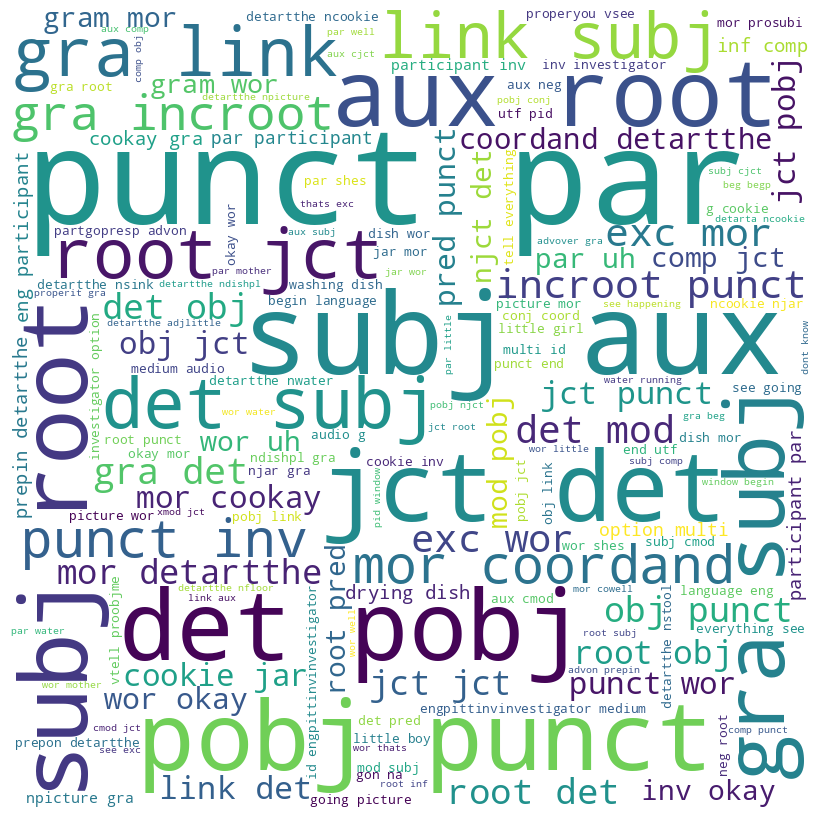

In [ ]:
from wordcloud import WordCloud

# Combine all preprocessed transcripts into a single string
all_transcripts = " ".join(transcripts)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(all_transcripts)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generate predictions
y_pred = model.predict(X_test)

# Convert predictions to labels
y_pred_labels = [1 if pred > 0.5 else 0 for pred in y_pred]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels)
recall = recall_score(y_test, y_pred_labels)
f1 = f1_score(y_test, y_pred_labels)
conf_matrix = confusion_matrix(y_test, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


9/9 [==============================] - 1s 43ms/step
Accuracy: 0.8581818181818182
Precision: 0.7936507936507936
Recall: 1.0
F1-Score: 0.8849557522123894
Confusion Matrix:
 [[ 86  39]
 [  0 150]]


In [ ]:
from keras.layers import Input, Dense, Flatten, Embedding, LSTM, BatchNormalization, Dropout, Concatenate
from keras.models import Model
from keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

# Rest of the code

# Assuming you have audio and text data split into training and testing sets
X_train_audio, X_test_audio, y_train, y_test = train_test_split(combined_mfcc_features, combined_labels, test_size=0.2, random_state=42)
X_train_text, X_test_text, _, _ = train_test_split(transcripts, labels, test_size=0.2, random_state=42)

# Tokenize and pad text sequences
max_words = 10000
max_seq_len_audio = desired_time_steps
max_seq_len_text = 500  # Adjust to match your desired sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_len_text)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_len_text)

num_samples = min(X_train_audio.shape[0], X_train_padded.shape[0])
X_train_audio = X_train_audio[:num_samples]
X_train_padded = X_train_padded[:num_samples]
y_train = y_train[:num_samples]

# Make sure both audio and text test data have the same number of samples
num_samples_test = min(X_test_audio.shape[0], X_test_padded.shape[0])
X_test_audio = X_test_audio[:num_samples_test]
X_test_padded = X_test_padded[:num_samples_test]
y_test = y_test[:num_samples_test]

# Build the text model
text_input = Input(shape=(max_seq_len_text,))
text_embed = Embedding(input_dim=max_words, output_dim=100, input_length=max_seq_len_text)(text_input)
text_lstm = LSTM(64)(text_embed)
text_dense = Dense(64, activation='relu')(text_lstm)

# Build the audio model
audio_input = Input(shape=(X_train_audio.shape[1], X_train_audio.shape[2]))
audio_flatten = Flatten()(audio_input)
audio_dense1 = Dense(128, activation='relu')(audio_flatten)
audio_bn1 = BatchNormalization()(audio_dense1)
audio_dropout1 = Dropout(0.5)(audio_bn1)
audio_dense2 = Dense(64, activation='relu')(audio_dropout1)
audio_bn2 = BatchNormalization()(audio_dense2)
audio_dropout2 = Dropout(0.5)(audio_bn2)

# Concatenate the outputs of the text and audio models
merged = Concatenate()([text_dense, audio_dropout2])

# Add more layers for final classification
merged_dense1 = Dense(128, activation='relu')(merged)
merged_bn1 = BatchNormalization()(merged_dense1)
merged_dropout1 = Dropout(0.5)(merged_bn1)
merged_dense2 = Dense(64, activation='relu')(merged_dropout1)
merged_bn2 = BatchNormalization()(merged_dense2)
merged_dropout2 = Dropout(0.5)(merged_bn2)
output_layer = Dense(1, activation='sigmoid')(merged_dropout2)

# Create the multimodal Siamese model
multimodal_model = Model(inputs=[text_input, audio_input], outputs=output_layer)

# Compile the model
optimizer = Adam(lr=0.001)
multimodal_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#history=multimodal_model.fit([X_train_padded, X_train_audio], y_train, epochs=50, validation_split=0.2)

# Evaluate the model
#loss, accuracy = multimodal_model.evaluate([X_test_padded, X_test_audio], y_test)
#print(f"Test loss: {loss}, Test accuracy: {accuracy}")


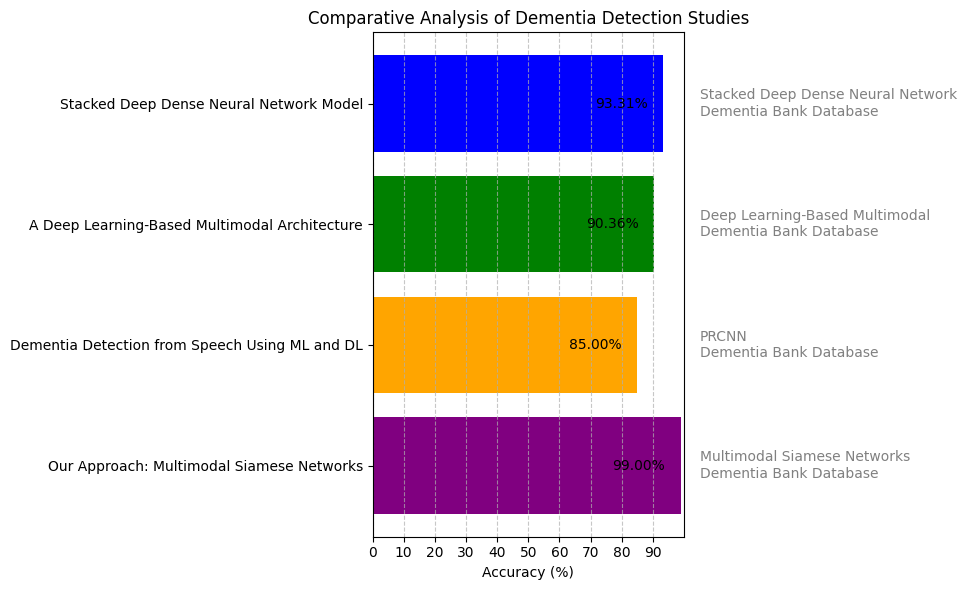

In [ ]:
import matplotlib.pyplot as plt

# Data for different studies and their results
studies = [
    "Stacked Deep Dense Neural Network Model",
    "A Deep Learning-Based Multimodal Architecture",
    "Dementia Detection from Speech Using ML and DL",
    "Our Approach: Multimodal Siamese Networks"
]
approaches = [
    "Stacked Deep Dense Neural Network",
    "Deep Learning-Based Multimodal",
    "PRCNN",
    "Multimodal Siamese Networks"
]
accuracies = [93.31, 90.36, 85.0, 99.0]
datasets = [
    "Dementia Bank Database",
    "Dementia Bank Database",
    "Dementia Bank Database",
    "Dementia Bank Database"
]

# Create a colorful and informative diagram
plt.figure(figsize=(10, 6))
bars = plt.barh(studies, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Accuracy (%)')
plt.title('Comparative Analysis of Dementia Detection Studies')
plt.xlim(0, 100)  # Adjust the x-axis limits
plt.xticks(range(0, 100, 10))  # Customize x-axis tick marks
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate the bars with approach and dataset information
for study, approach, dataset in zip(studies, approaches, datasets):
    plt.text(105, studies.index(study), f'{approach}\n{dataset}', va='center', ha='left', color='gray')

# Annotate the left side of bars with accuracy percentages
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height()/2, f'{accuracy:.2f}%', va='center', ha='right', color='black')

plt.tight_layout()
plt.show()


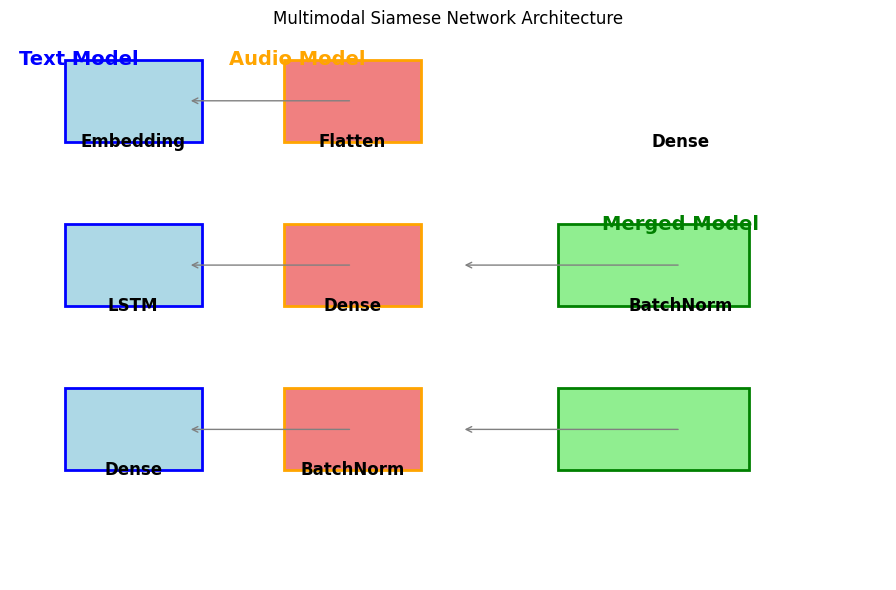

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Define block colors
text_color = 'lightblue'
audio_color = 'lightcoral'
merged_color = 'lightgreen'

# Define block sizes
block_width = 2.5
block_height = 1.5
merged_block_width = 3.5

# Draw text model blocks
text_blocks = [
    patches.Rectangle((1, 8), block_width, block_height, linewidth=2, edgecolor='blue', facecolor=text_color),
    patches.Rectangle((1, 5), block_width, block_height, linewidth=2, edgecolor='blue', facecolor=text_color),
    patches.Rectangle((1, 2), block_width, block_height, linewidth=2, edgecolor='blue', facecolor=text_color),
]

# Draw audio model blocks
audio_blocks = [
    patches.Rectangle((5, 8), block_width, block_height, linewidth=2, edgecolor='orange', facecolor=audio_color),
    patches.Rectangle((5, 5), block_width, block_height, linewidth=2, edgecolor='orange', facecolor=audio_color),
    patches.Rectangle((5, 2), block_width, block_height, linewidth=2, edgecolor='orange', facecolor=audio_color),
]

# Draw merged model blocks
merged_blocks = [
    patches.Rectangle((10, 5), merged_block_width, block_height, linewidth=2, edgecolor='green', facecolor=merged_color),
    patches.Rectangle((10, 2), merged_block_width, block_height, linewidth=2, edgecolor='green', facecolor=merged_color),
]

# Add blocks to the axes
for block in text_blocks + audio_blocks + merged_blocks:
    ax.add_patch(block)

# Add text labels to the blocks
text_labels = ['Embedding', 'LSTM', 'Dense']
audio_labels = ['Flatten', 'Dense', 'BatchNorm']
merged_labels = ['Dense', 'BatchNorm']

all_labels = text_labels + audio_labels + merged_labels

for i, label in enumerate(all_labels):
    x = 2.25 if i < 3 else 6.25 if i < 6 else 12.25
    y = 8 - (i % 3) * 3
    ax.text(x, y, label, ha='center', va='center', fontsize=12, weight='bold')

# Add connections between blocks
connections = [
    ((3.25, 8.75), (6.25, 8.75)),
    ((3.25, 5.75), (6.25, 5.75)),
    ((3.25, 2.75), (6.25, 2.75)),
    ((8.25, 5.75), (12.25, 5.75)),
    ((8.25, 2.75), (12.25, 2.75)),
]

for conn in connections:
    ax.annotate('', xy=conn[0], xytext=conn[1], arrowprops=dict(arrowstyle='->', color='gray'))

# Add model labels
ax.text(1.25, 9.5, 'Text Model', ha='center', va='center', fontsize=14, weight='bold', color='blue')
ax.text(5.25, 9.5, 'Audio Model', ha='center', va='center', fontsize=14, weight='bold', color='orange')

# Add merged model label
ax.text(12.25, 6.5, 'Merged Model', ha='center', va='center', fontsize=14, weight='bold', color='green')

# Set plot properties
ax.set_xlim(0, 16)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.axis('off')

# Add title
plt.title('Multimodal Siamese Network Architecture')

# Show the plot
plt.tight_layout()
plt.show()


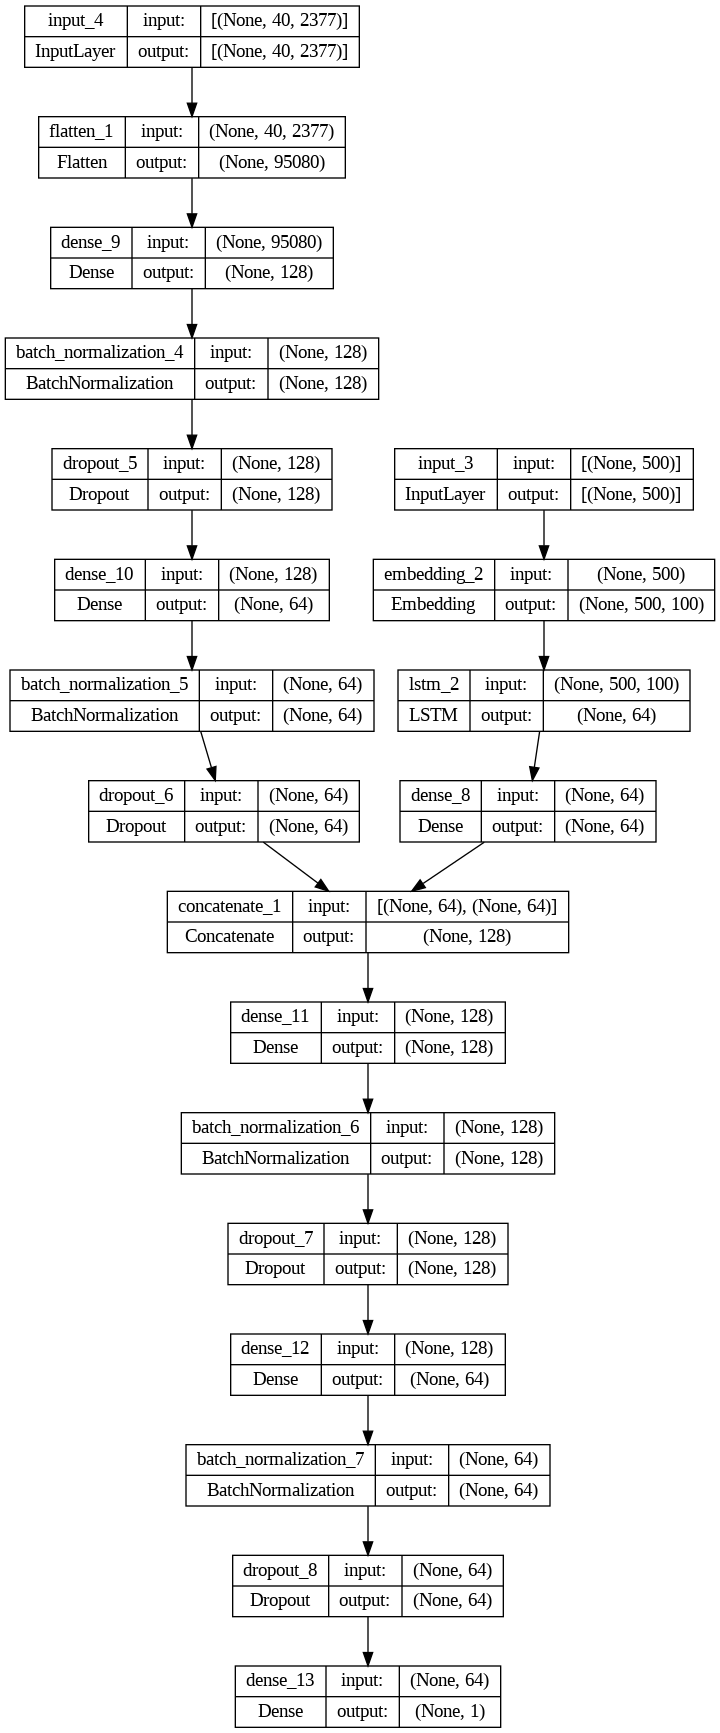

In [ ]:
from keras.utils import plot_model

plot_model(multimodal_model, to_file='model.png', show_shapes=True)

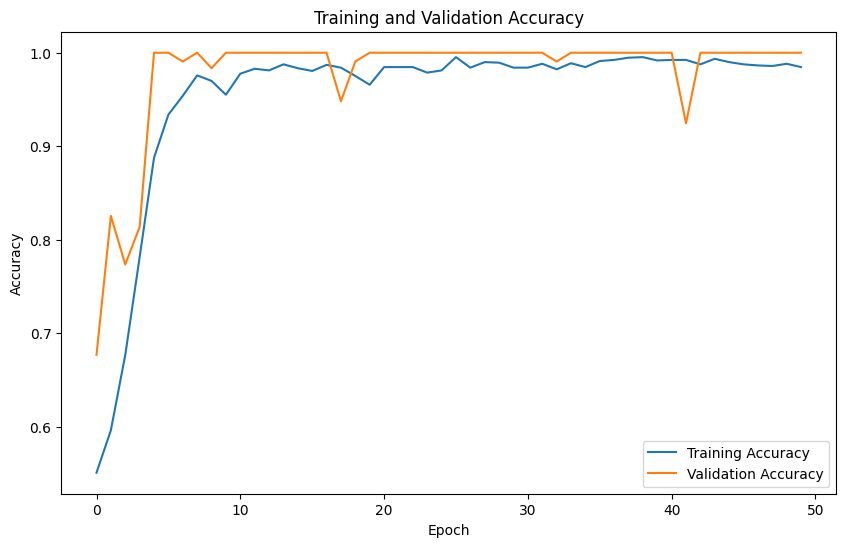

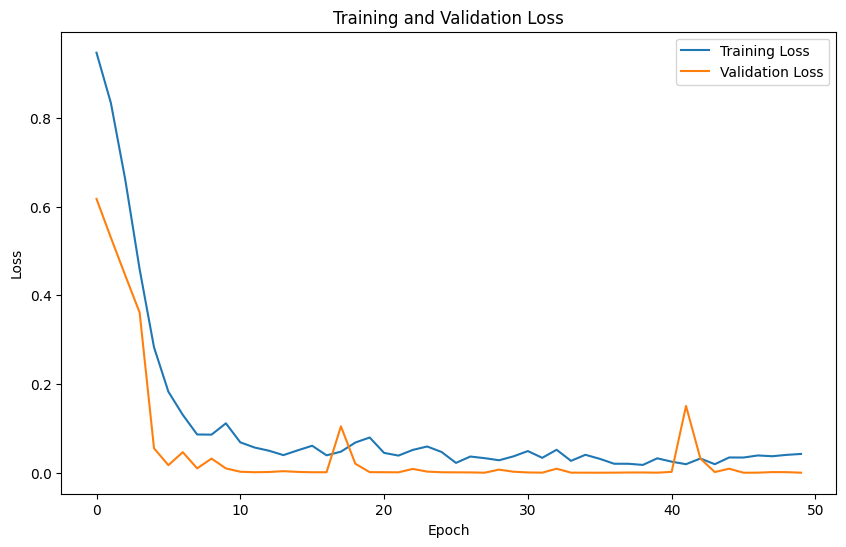

In [ ]:
import matplotlib.pyplot as plt



# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
X_train_audio.shape

(428, 40, 2377)

In [ ]:
X_train_padded.shape

(273, 500)

In [ ]:
X_train_padded.shape

(439, 500)

In [ ]:
X_train.shape

(428, 40, 2377)

In [ ]:
from sklearn.metrics import classification_report

# Predict on test data
y_pred = multimodal_model.predict([X_test_padded, X_test_audio])
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", report)


17/17 [==============================] - 1s 57ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       241
           1       1.00      1.00      1.00       289

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530



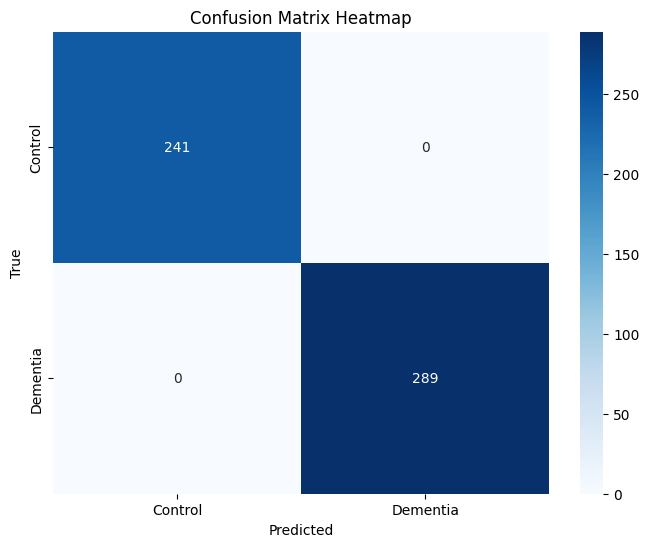

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Control', 'Dementia'], yticklabels=['Control', 'Dementia'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()


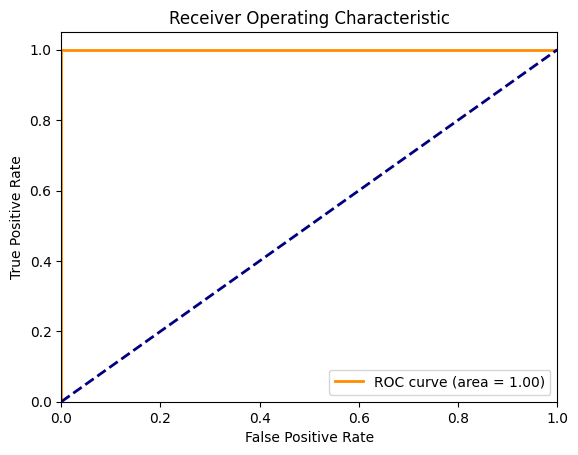

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
